In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Carregando DataFrame
df = pd.read_csv('http://www.senado.gov.br/transparencia/LAI/verba/2018.csv', sep = ';', encoding = 'latin1', decimal = ',', skiprows = 1)

In [3]:
# Amostra do DataFrame
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...",1553.99
4,2018,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,01/02/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00


In [4]:
# Informações sobre os dados e colunas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 10 columns):
ANO                  24492 non-null int64
MES                  24492 non-null int64
SENADOR              24492 non-null object
TIPO_DESPESA         24492 non-null object
CNPJ_CPF             24492 non-null object
FORNECEDOR           24492 non-null object
DOCUMENTO            23476 non-null object
DATA                 24492 non-null object
DETALHAMENTO         18882 non-null object
VALOR_REEMBOLSADO    24492 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


In [5]:
# Algumas informações sobre os dados da coluna 'VALOR_REEMBOLSADO'
df['VALOR_REEMBOLSADO'].describe()

count     24492.000000
mean       1045.431215
std        2718.840577
min           0.010000
25%         125.000000
50%         287.200000
75%        1032.005000
max      103900.000000
Name: VALOR_REEMBOLSADO, dtype: float64

In [6]:
# Quais são os TOP 10 senadores que tiveram os maiores valores de pedido de reembolso no ano de 2018 ? Ordenado do maior para o menor valor.
df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending = False).head(10)

SENADOR
EDUARDO BRAGA         529599.18
VANESSA GRAZZIOTIN    515969.63
JOÃO CAPIBERIBE       513333.90
ÂNGELA PORTELA        485806.44
OMAR AZIZ             484143.98
CIRO NOGUEIRA         455942.09
ROMERO JUCÁ           454526.97
GLADSON CAMELI        443981.70
FERNANDO COLLOR       435944.08
JORGE VIANA           430121.30
Name: VALOR_REEMBOLSADO, dtype: float64

In [7]:
# Quais foram os TOP 10 senadores que mais pediram reembolso no ano de 2018 ?
df['SENADOR'].value_counts().sort_values(ascending = False).head(10)

EDUARDO LOPES              864
PAULO BAUER                824
WELLINGTON FAGUNDES        800
JOSÉ SERRA                 715
GLEISI HOFFMANN            653
HUMBERTO COSTA             648
LÍDICE DA MATA             628
JOSÉ MEDEIROS              598
FERNANDO BEZERRA COELHO    560
ARMANDO MONTEIRO           550
Name: SENADOR, dtype: int64

In [8]:
# Para qual tipo de despesa os senadores pediram mais reembolso ?
df['TIPO_DESPESA'].value_counts().sort_values(ascending = False)

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   10147
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  5820
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                            5042
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      1761
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                              

In [9]:
# Quem fez o maior pedido de reembolso ?
df[df.VALOR_REEMBOLSADO == 103900]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
21225,2018,12,ROSE DE FREITAS,Divulgação da atividade parlamentar,05.461.408/0001-84,Grafitusa S/A,000009681,29/03/2019,NaN,103900.0


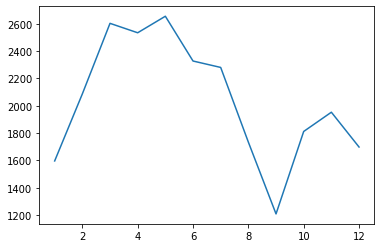

In [10]:
# Qual o mês que teve maior pedido de reembolso ?
periodo_reembolso = df.groupby(['MES'])['VALOR_REEMBOLSADO'].count()
plt.plot(periodo_reembolso)

In [11]:
# Para quais 2 fornecedores tiveram mais solicitações de reembolso?
df['FORNECEDOR'].value_counts().head(2)

LATAM                                          615
Posto de Gasolina e Garagem Echeverria Ltda    547
Name: FORNECEDOR, dtype: int64